In [1]:
from libeq.data_structure import SolverData
from libeq import EqSolver
from libeq import species_concentration
import numpy as np
import matplotlib.pyplot as plt

%load_ext pyinstrument

# Create SolverData object
solver_data = SolverData.load_from_pyes(
    "/Users/lorenzo/Coding/libeq/notebooks/cu_gly_solid.json"
)

In [2]:
solver_data.solid_stoichiometry

array([[ 1],
       [ 0],
       [-2]], dtype=int8)

In [3]:
solver_data.distribution_opts.initial_log = 2
solver_data.distribution_opts.final_log = 12
solver_data.ionic_strength_dependence = True

In [4]:
result, log_beta, log_ks, saturation_index, total_concentration = EqSolver(
    solver_data, mode="distribution"
)

In [5]:
log_ks

array([[8.98503021],
       [8.98038609],
       [8.97625899],
       [8.97260326],
       [8.96937319],
       [8.96652468],
       [8.96401612],
       [8.96180848],
       [8.95986481],
       [8.95814968],
       [8.9566286 ],
       [8.95526788],
       [8.95403481],
       [8.95289821],
       [8.95182911],
       [8.95080162],
       [8.94979358],
       [8.94878722],
       [8.94776943],
       [8.94673188],
       [8.94567079],
       [8.94458643],
       [8.94348245],
       [8.94236507],
       [8.94124216],
       [8.94012241],
       [8.93901448],
       [8.93792625],
       [8.93686424],
       [8.93583322],
       [8.934836  ],
       [8.93387347],
       [8.93294489],
       [8.93204828],
       [8.93118093],
       [8.93033992],
       [8.92952251],
       [8.92872642],
       [8.92794999],
       [8.9271922 ],
       [8.92645262],
       [8.92573126],
       [8.92502848],
       [8.92434487],
       [8.92368108],
       [8.92303781],
       [8.92241569],
       [8.921

In [6]:
log_beta

array([[  9.57651582,  12.01728884,  -8.26503021, ...,   8.16225863,
         15.00877446, -13.71728884],
       [  9.58094443,  12.0216097 ,  -8.26038609, ...,   8.1712236 ,
         15.02216804, -13.7216097 ],
       [  9.58489733,  12.0254755 ,  -8.25625899, ...,   8.17921651,
         15.03411384, -13.7254755 ],
       ...,
       [  9.57951172,  12.02021063,  -8.2618861 , ...,   8.16832453,
         15.01783626, -13.72021063],
       [  9.57303105,  12.01389697,  -8.26870079, ...,   8.15519618,
         14.99822722, -13.71389697],
       [  9.56590767,  12.00698793,  -8.27625285, ...,   8.14073508,
         14.97664275, -13.70698793]])

In [7]:
solution = species_concentration(
    result, log_beta=log_beta, stoichiometry=solver_data.stoichiometry, full=True
)

In [13]:
charges = np.concatenate((solver_data.charges, solver_data.species_charges))
only_soluble = np.concatenate(
    (
        solution[:, :3],
        solution[:, -12:],
    ),
    axis=1,
)

ionic_strength = 0.5 * (only_soluble * (charges**2)).sum(axis=1, keepdims=True)

ionic_strength

array([[7.73016506e-03],
       [6.65263293e-03],
       [5.78162919e-03],
       [5.07434920e-03],
       [4.49719040e-03],
       [4.02381088e-03],
       [3.63352615e-03],
       [3.30999393e-03],
       [3.04015835e-03],
       [2.81343208e-03],
       [2.62109112e-03],
       [2.45584983e-03],
       [2.31157860e-03],
       [2.18312670e-03],
       [2.06621651e-03],
       [1.95738112e-03],
       [1.85392201e-03],
       [1.75386854e-03],
       [1.65592517e-03],
       [1.55939846e-03],
       [1.46410176e-03],
       [1.37024226e-03],
       [1.27829914e-03],
       [1.18890349e-03],
       [1.10272991e-03],
       [1.02040709e-03],
       [9.42451337e-04],
       [8.69224470e-04],
       [8.00915030e-04],
       [7.37540512e-04],
       [6.78966990e-04],
       [6.24941482e-04],
       [5.75131468e-04],
       [5.29165558e-04],
       [4.86669779e-04],
       [4.47295385e-04],
       [4.10736256e-04],
       [3.76736125e-04],
       [3.45087561e-04],
       [3.15625490e-04],


In [10]:
total_concentration

array([[ 1.00000000e-03,  2.00000000e-03,  1.34644182e-02],
       [ 1.00000000e-03,  2.00000000e-03,  1.13113830e-02],
       [ 1.00000000e-03,  2.00000000e-03,  9.57229127e-03],
       [ 1.00000000e-03,  2.00000000e-03,  8.16184836e-03],
       [ 1.00000000e-03,  2.00000000e-03,  7.01323858e-03],
       [ 1.00000000e-03,  2.00000000e-03,  6.07424631e-03],
       [ 1.00000000e-03,  2.00000000e-03,  5.30404993e-03],
       [ 1.00000000e-03,  2.00000000e-03,  4.67058822e-03],
       [ 1.00000000e-03,  2.00000000e-03,  4.14844191e-03],
       [ 1.00000000e-03,  2.00000000e-03,  3.71718594e-03],
       [ 1.00000000e-03,  2.00000000e-03,  3.36016004e-03],
       [ 1.00000000e-03,  2.00000000e-03,  3.06358921e-03],
       [ 1.00000000e-03,  2.00000000e-03,  2.81597628e-03],
       [ 1.00000000e-03,  2.00000000e-03,  2.60768967e-03],
       [ 1.00000000e-03,  2.00000000e-03,  2.43068127e-03],
       [ 1.00000000e-03,  2.00000000e-03,  2.27828426e-03],
       [ 1.00000000e-03,  2.00000000e-03

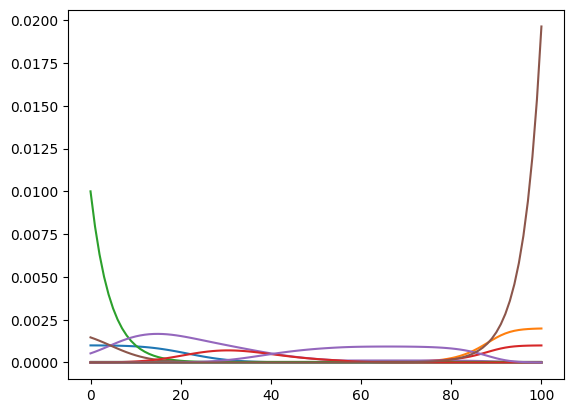

In [11]:
plt.plot(solution);